## 모듈 추가

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, BatchNormalization, Input, MaxPool2D, Reshape, Softmax
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

## cifar10 데이터셋 다운로드

In [2]:
(x_train_ori, _), (x_test_ori, _) = tf.keras.datasets.cifar10.load_data()

## 분할, 통합 함수

In [3]:
def slice(x): return np.array([x[0:16, 0:16], x[0:16, 16:32], x[16:32, 0:16], x[16:32, 16:32]])

def together(x):
    [t1, t2, t3, t4] = x
    return np.concatenate((np.concatenate((t1, t2), axis=1),
                           np.concatenate((t3, t4), axis=1)), axis=0)

## 훈련 세트 전처리

In [4]:
x_train = []
y_train = []

for i in x_train_ori:
    y = np.random.permutation(range(4))
    x = slice(i)
    x = x[y]
    x_train.append(together(x))
    y_train.append(y)

## 테스트 세트 전처리

In [5]:
x_test = []
y_test = []

for i in x_test_ori:
    y = np.random.permutation(range(4))
    x = slice(i)
    x = x[y]
    x_test.append(together(x))
    y_test.append(y)

## 전처리 결과 출력

<module 'matplotlib.pyplot' from 'C:\\Users\\roharui\\AppData\\Local\\Programs\\Python\\Python38\\lib\\site-packages\\matplotlib\\pyplot.py'>

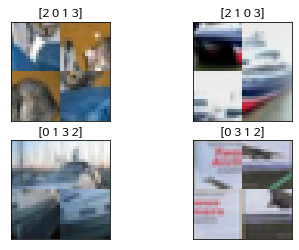

In [6]:
for num, i in enumerate(x_test[:4]):
    ax = plt.subplot(2, 2, num + 1)
    ax.set_title(y_test[num])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(i)
plt

## 데이터셋을 넘파이 배열로

In [7]:
x_train = np.array(x_train)
x_test  = np.array(x_test)
y_train = np.array(y_train)
y_test  = np.array(y_test)

## 모델 설계

In [8]:
model = Sequential(name="Shuffle_Finder")

model.add(Input(shape=(32, 32, 3)))
model.add(Conv2D(32, (2, 2), padding='same', activation='relu'))
model.add(BatchNormalization(-1))
model.add(Conv2D(16, (2, 2), padding='same', activation='relu'))
model.add(BatchNormalization(-1))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(32, (2, 2), padding='same', activation='relu'))
model.add(BatchNormalization(-1))
model.add(Conv2D(16, (2, 2), padding='same', activation='relu'))
model.add(BatchNormalization(-1))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(32, (2, 2), padding='same', activation='relu'))
model.add(BatchNormalization(-1))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(300))
model.add(Dropout(0.25))
model.add(Dense(100))
model.add(Dropout(0.25))
model.add(Dense(16))
model.add(Reshape((4, 4)))
model.add(Softmax(axis=2))

## 모델 개요

In [9]:
model.summary()

Model: "Shuffle_Finder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        416       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 16)        2064      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 16)        64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 32)     

## 모델 컴파일

In [10]:
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['acc'],)

## 체크포인트

In [11]:
checkpoint_filepath = '''
checkpoint/checkpoint-epoch-{epoch:02d}-loss-{loss:.2f}-trial.ckpt
'''
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='loss',       
    verbose=1,            
    save_best_only=True,  
    mode='auto'           
)

## 모델 학습

In [ ]:
model.fit(x_train, y_train, batch_size=1000, epochs=20, callbacks=[model_checkpoint_callback])

## 모델 불러오기

In [24]:
model.load_weights("checkpoint/weight.h5")

## 테스트 셋으로 성능 측정

In [25]:
model.evaluate(x_test, y_test, batch_size=30)

334/334 [==============================] - 3s 9ms/step - loss: 0.5764 - acc: 0.7753


[0.5764296650886536, 0.7753250002861023]

## 테스트 하기

In [29]:
result = model.predict(x_test[:10]).argmax(axis=2)
for x, y in zip(result, y_test[:10]):
    print("예측 값 : ", x)
    print("실제 값 : ", y)
    print("=========")

예측 값 :  [3 0 1 2]
실제 값 :  [2 0 1 3]
예측 값 :  [2 1 0 3]
실제 값 :  [2 1 0 3]
예측 값 :  [1 1 3 2]
실제 값 :  [0 1 3 2]
예측 값 :  [0 1 3 2]
실제 값 :  [0 3 1 2]
예측 값 :  [3 1 2 0]
실제 값 :  [3 1 2 0]
예측 값 :  [2 1 3 2]
실제 값 :  [3 1 0 2]
예측 값 :  [1 2 3 0]
실제 값 :  [1 3 2 0]
예측 값 :  [3 0 1 2]
실제 값 :  [2 1 0 3]
예측 값 :  [2 0 1 3]
실제 값 :  [3 2 1 0]
예측 값 :  [3 1 0 2]
실제 값 :  [3 1 0 2]
